# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 1</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof.</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Cole Nockolds</center></h1>
#### <h1><center>Due day: 11:00 pm, Monday, 16, September, 2024 </center></h1>
### If you use this jupyter notebook for the assignment, please convert to .pdf file for submission. For other options, all submission MUST be in pdf format, except codes.

--- 

Suppose we would like to solve the following nonlinear optimization problem

\begin{equation}
\min_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
\end{equation}

We shall explore the gradient descent algorithm (the workhorse of machine learning) to find an approximate local minimum. See the supplementary document (**Modules -> Optimization_Probability.pdf -> section-1.3**) for further details on general idea, derivation, practical aspect of gradient descent algorithm. Below is a pseudo code.

### **Algorithm: Gradient descent**

**Inputs:** Tolerance $\tau$, initial guess $\boldsymbol{\theta}^i$, $i=0$

*while* $||\nabla_{\boldsymbol{\theta}}(\boldsymbol{\theta}^i)|| \geq \tau$ do
    
\begin{align*}
    & \boldsymbol{\theta}^{i} := \boldsymbol{\theta}^{i-1} - \alpha \cdot \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}^{i-1}). \\
    & i = i + 1
\end{align*}

*end*

$\boldsymbol{\theta}^* = \boldsymbol{\theta}^i$


**Output:** The approximate minimizer $\boldsymbol{\theta}^*$

---

## **Question 1** (Linear regression for 2 linear features)

Load the UCI Diabetes Dataset and identify the *BMI* and *BP* features, denoted as $x_1, x_2$, respectively. The diabetes risk score is the target variable and is denoted as $y$. We assume the model for linear regression has the following form

$$ \bar{y} = 0.4638 + \theta_1 x_1 + \theta_2 x_2.$$

The mean square error loss function is given by

$$J(\boldsymbol{\theta})=\frac{1}{2n}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients, $y^{(i)}$ is the data for the $i$ th patient, and $\bar{y}^{(i)} = 0.4638 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)}$ with $x_1^{(i)}$ and $x_2^{(i)}$ being the BMI and BP features of the $i$ th patient.

- (1.a) (+25 pt) Using the gradient descent algorithm, find the optimal $\theta_1$ and $\theta_2$. You need to use the pseudo code below as the skeleton/blueprint for your codes.

- (1.b) (+5 pt) Plot the contours of the loss function over the square domain $[0,4]^2$

- (1.c) (+10 pt) Plot the history the gradient descent vector on the contour map from the two initial guesses $(\theta_1, \theta_2) = (4,4)$ and $(\theta_1, \theta_2) = (0,0)$. You can plot a vector for every 100 iterations.

Iteration 0. MSE: 0.027770
Iteration 100. MSE: 0.012752
Iteration 200. MSE: 0.012271
Iteration 300. MSE: 0.012134
Iteration 400. MSE: 0.012092
Iteration 500. MSE: 0.012079
Iteration 600. MSE: 0.012075
Iteration 700. MSE: 0.012074
Iteration 800. MSE: 0.012074
Iteration 900. MSE: 0.012074
Iteration 1000. MSE: 0.012073
Iteration 1100. MSE: 0.012073
Iteration 1200. MSE: 0.012073
Iteration 1300. MSE: 0.012073
Iteration 1400. MSE: 0.012073
Iteration 1500. MSE: 0.012073
Iteration 1600. MSE: 0.012073
Optimal Theta: [3.61289603 0.22781244]


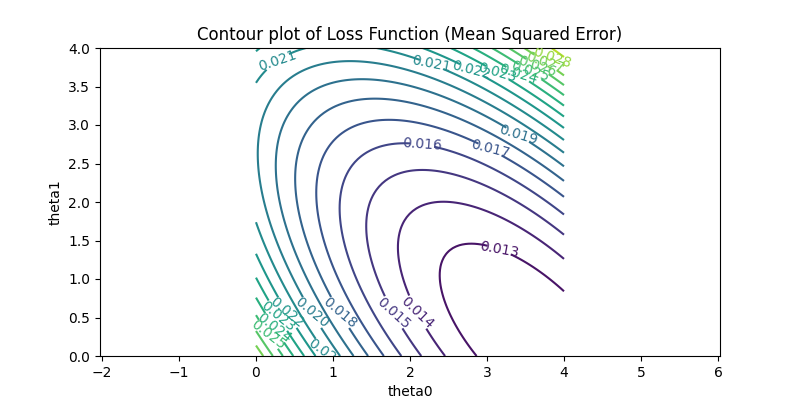

In [75]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(theta, X):
    # [your work!]
    return 0.4638 + theta[0] * X.iloc[:, 0] + theta[1] * X.iloc[:, 1]

def mean_squared_error(theta, X, y):
    # [your work!]
    y_pred = f(theta, X)
    return 1 / (2 * len(y)) * np.sum((y - y_pred) ** 2) 

def mse_gradient(theta, X, y):
    # [your work!]
    return np.sum((f(theta, X) - y) * X.T, axis=1).values # vs np.mean

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

tolerance = 1e-6
step_size = 4e-1
theta =  np.array([0,0]) # [your work!] np.array([0,0]) or np.array([4,4]) for (1.c)
theta_prev = np.array([1,1])
opt_pts = [theta]
opt_grads = []
# [your work!]
iter = 0
while np.linalg.norm(theta - theta_prev) > tolerance:
    # [your work!]
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    if iter == 10:
        theta_mid = theta
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1
print("Optimal Theta:", theta)

theta0_grid = np.linspace(0,4,101)
theta1_grid = np.linspace(0,4,101)


t0,t1 = np.meshgrid(theta0_grid, theta1_grid)
# Initialize J_grid to store the MSE values
J_grid = np.zeros(t0.shape)

# Compute the MSE for each combination of theta0 and theta1
for i in range(t0.shape[0]):
    for j in range(t0.shape[1]):
        theta = np.array([t0[i, j], t1[i, j]])
        J_grid[i, j] = mean_squared_error(theta, X_train, y_train)

plt.clf()
contours = plt.contour(t0,t1, J_grid, 10)

plt.clabel(contours)
plt.axis('equal')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Contour plot of Loss Function (Mean Squared Error)')
plt.show()


---

## **Question 2** (Linear regression for 2 nonlinear features, Multivariate Polynomial Regression)

For this question, we still consider the pairs of *BMI* and *BP* features ($x_1, x_2$) as in Question 1. However, the linear model now is changed to

$$ \bar{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2$$

The mean square error loss function is still the same

$$J(\boldsymbol{\theta})=\frac{1}{2n}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$

where, again, $n$ is the number of patients. ($x_1^{(i)}, x_2^{(i)}, y^{(i)}$) are the same as in Question 1.

- (+30 pt) Using the gradient descent algorithm, find the optimal $ \boldsymbol{\theta}^* = \{\theta_i\}_{i = 0}^5$. You need to use the pseudo code below as the skeleton/blueprint for your codes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(...):
    # [your work!]
    return ...

def mean_squared_error(...):
    # [your work!]
    return ...

def mse_gradient(...):
    # [your work!]
    return ...

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

tolerance = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([0,0,0,0,0,0]), np.array([1,1,1,1,1,1])
iter = 0
# [your work!]

while np.linalg.norm(theta - theta_prev) > tolerance:
    if iter > 200000:
        break
    # [your work!]

SyntaxError: invalid syntax (3663433096.py, line 8)

---

## **Question 3** (Linear regression for 2 nonlinear features)

Instead of using gradient descent, use the ordinary least squares approach to 

- (3.a) (+10 pt) derive the gradient of the loss function with respect to $\boldsymbol{\theta}$ $$ \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$$

- (3.b) (+10 pt) derive the optimal solution $$\boldsymbol{\theta}^* = (\theta_i)_{i = 0}^5$$


(3.c) (+10 pt) Let $X$ be the feature matrix, determine under which conditions the following matrix

$$ X^T X $$

is invertible, or $$ \boldsymbol{\theta}^T (X^T X) \boldsymbol{\theta} > 0.$$



---

## **Question 4** (Bounus +10): 
1. Are solutions, $\boldsymbol{\theta}^*$, from Question 2 and Question 3 exactly the same? If not, which solution is the accurate one? Explain the reason for your answer.
2. If the $\boldsymbol{\theta}^*$ are different, can you propose a way to improve the accuracy of inaccurate solution?